In [ ]:
# Instalar el motor si hace falta (una sola vez)
!pip install openpyxl --quiet


In [ ]:
from google.colab import files

# Te pedirá seleccionar archivos desde tu PC
uploaded = files.upload()


Saving hawai_2024.xlsx.csv to hawai_2024.xlsx.csv
Saving hawai_2023.xlsx.csv to hawai_2023.xlsx.csv


In [ ]:
import pandas as pd

df_2023 = pd.read_csv("hawai_2023.xlsx.csv")
df_2024 = pd.read_csv("hawai_2024.xlsx.csv")

df = pd.concat([df_2023, df_2024], ignore_index=True)

df.head()


,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2023,AQS,150030010,2,0.1,ppm,1,Kapolei,19,79.0,...,Carbon monoxide,593,46520,"Urban Honolulu, HI",15,Hawaii,3,Honolulu,21.323745,-158.088613
1,01/02/2023,AQS,150030010,2,0.1,ppm,1,Kapolei,24,100.0,...,Carbon monoxide,593,46520,"Urban Honolulu, HI",15,Hawaii,3,Honolulu,21.323745,-158.088613
2,01/03/2023,AQS,150030010,2,0.1,ppm,1,Kapolei,24,100.0,...,Carbon monoxide,593,46520,"Urban Honolulu, HI",15,Hawaii,3,Honolulu,21.323745,-158.088613
3,01/04/2023,AQS,150030010,2,0.1,ppm,1,Kapolei,24,100.0,...,Carbon monoxide,593,46520,"Urban Honolulu, HI",15,Hawaii,3,Honolulu,21.323745,-158.088613
4,01/05/2023,AQS,150030010,2,0.2,ppm,2,Kapolei,24,100.0,...,Carbon monoxide,593,46520,"Urban Honolulu, HI",15,Hawaii,3,Honolulu,21.323745,-158.088613


In [ ]:

# Convertir a tipo fecha
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Eliminar filas con fecha inválida
df = df.dropna(subset=['Date'])

# Ordenar por fecha
df = df.sort_values('Date').reset_index(drop=True)

# Renombrar la columna a 'date' para facilitar
df = df.rename(columns={'Date': 'date'})

# Crear columnas de año y mes (útil más adelante)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Comprobar resultado
df.head()


,date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude,year,month
0,2023-01-01,AQS,150030010,2,0.1,ppm,1,Kapolei,19,79.0,...,46520,"Urban Honolulu, HI",15,Hawaii,3,Honolulu,21.323745,-158.088613,2023,1
1,2023-01-01,AQS,150031001,1,0.1,ppm,1,Honolulu,19,79.0,...,46520,"Urban Honolulu, HI",15,Hawaii,3,Honolulu,21.307580,-157.855420,2023,1
2,2023-01-02,AQS,150031001,1,0.0,ppm,0,Honolulu,24,100.0,...,46520,"Urban Honolulu, HI",15,Hawaii,3,Honolulu,21.307580,-157.855420,2023,1
3,2023-01-02,AQS,150030010,2,0.1,ppm,1,Kapolei,24,100.0,...,46520,"Urban Honolulu, HI",15,Hawaii,3,Honolulu,21.323745,-158.088613,2023,1
4,2023-01-03,AQS,150030010,2,0.1,ppm,1,Kapolei,24,100.0,...,46520,"Urban Honolulu, HI",15,Hawaii,3,Honolulu,21.323745,-158.088613,2023,1


Columnas actuales: ['date', 'Source', 'Site ID', 'POC', 'Daily Max 8-hour CO Concentration', 'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count', 'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description', 'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State', 'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude', 'year', 'month']

Estadísticas básicas de la variable objetivo:
count    1269.000000
mean        0.143105
std         0.098379
min        -0.200000
25%         0.100000
50%         0.100000
75%         0.200000
max         1.900000
Name: Daily Max 8-hour CO Concentration, dtype: float64


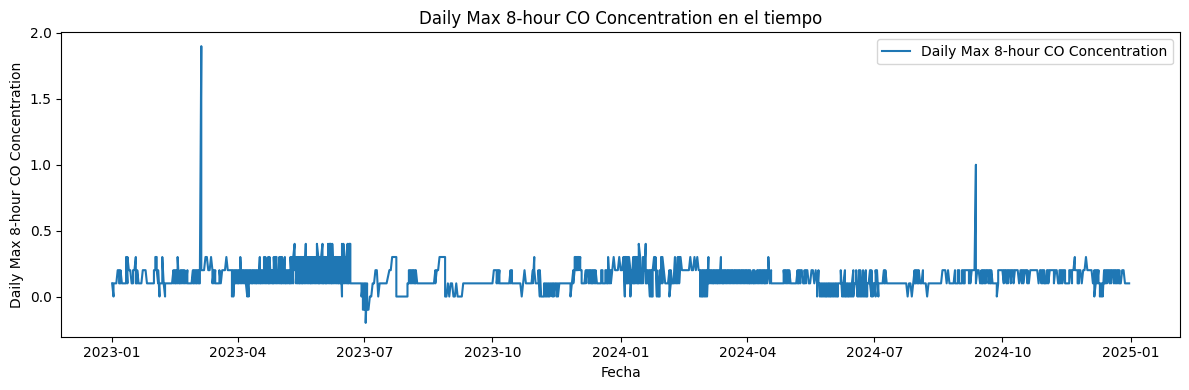

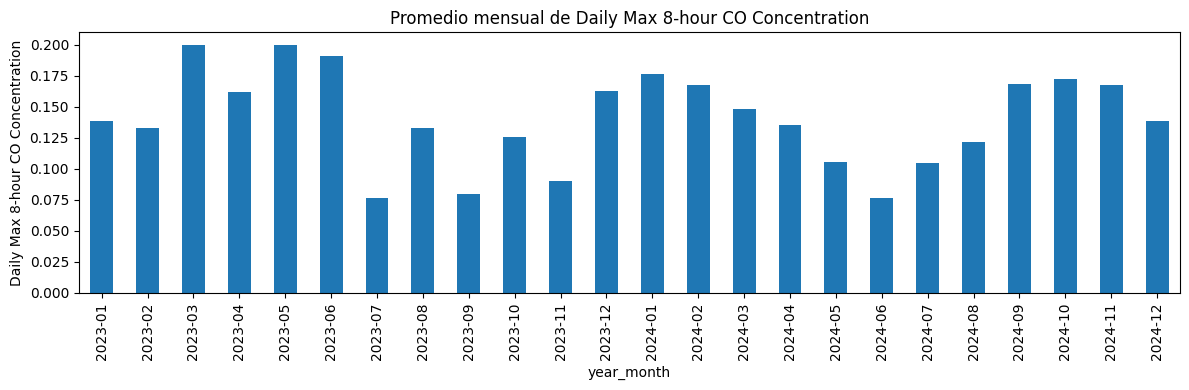

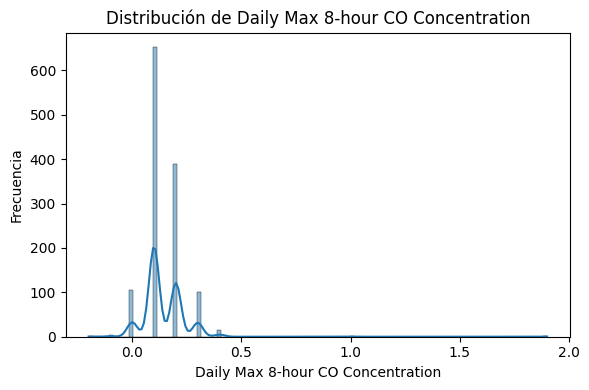

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ver nombres de columnas para elegir la variable de análisis
print("Columnas actuales:", df.columns.tolist())

# Por ejemplo vamos a analizar la concentración diaria de CO
# (Daily Max 8-hour CO Concentration) — cámbialo si quieres otra
columna_objetivo = 'Daily Max 8-hour CO Concentration'

# Estadísticas básicas
print("\nEstadísticas básicas de la variable objetivo:")
print(df[columna_objetivo].describe())

# Graficar la serie temporal completa
plt.figure(figsize=(12,4))
plt.plot(df['date'], df[columna_objetivo], label=columna_objetivo)
plt.title(f'{columna_objetivo} en el tiempo')
plt.xlabel('Fecha')
plt.ylabel(columna_objetivo)
plt.legend()
plt.tight_layout()
plt.show()

# Graficar promedio por mes para ver estacionalidad
df['year_month'] = df['date'].dt.to_period('M')
promedios_mensuales = df.groupby('year_month')[columna_objetivo].mean()

plt.figure(figsize=(12,4))
promedios_mensuales.plot(kind='bar')
plt.title(f'Promedio mensual de {columna_objetivo}')
plt.ylabel(columna_objetivo)
plt.tight_layout()
plt.show()

# Histograma para ver la distribución de la variable objetivo
plt.figure(figsize=(6,4))
sns.histplot(df[columna_objetivo].dropna(), kde=True)
plt.title(f'Distribución de {columna_objetivo}')
plt.xlabel(columna_objetivo)
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


In [ ]:

# --- 1) Elegir la variable objetivo ---
columna_objetivo = 'Daily Max 8-hour CO Concentration'  # cámbialo si quieres otra

# --- 2) Variables temporales (si no las hiciste antes) ---
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['dayofyear'] = df['date'].dt.dayofyear

# --- 3) Crear lags y medias móviles ---
df[f'{columna_objetivo}_lag1'] = df[columna_objetivo].shift(1)
df[f'{columna_objetivo}_ma7'] = df[columna_objetivo].rolling(window=7, min_periods=1).mean()

# --- 4) Eliminar filas con NaNs que se crean al hacer lag ---
df_model = df.dropna(subset=[f'{columna_objetivo}_lag1'])

# Comprobar
print("Columnas del DataFrame para modelar:")
print(df_model.columns.tolist())

df_model.head()


Columnas del DataFrame para modelar:
['date', 'Source', 'Site ID', 'POC', 'Daily Max 8-hour CO Concentration', 'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count', 'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description', 'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State', 'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude', 'year', 'month', 'year_month', 'day', 'weekday', 'dayofyear', 'Daily Max 8-hour CO Concentration_lag1', 'Daily Max 8-hour CO Concentration_ma7']


,date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Site Latitude,Site Longitude,year,month,year_month,day,weekday,dayofyear,Daily Max 8-hour CO Concentration_lag1,Daily Max 8-hour CO Concentration_ma7
1,2023-01-01,AQS,150031001,1,0.1,ppm,1,Honolulu,19,79.0,...,21.307580,-157.855420,2023,1,2023-01,1,6,1,0.1,0.100000
2,2023-01-02,AQS,150031001,1,0.0,ppm,0,Honolulu,24,100.0,...,21.307580,-157.855420,2023,1,2023-01,2,0,2,0.1,0.066667
3,2023-01-02,AQS,150030010,2,0.1,ppm,1,Kapolei,24,100.0,...,21.323745,-158.088613,2023,1,2023-01,2,0,2,0.0,0.075000
4,2023-01-03,AQS,150030010,2,0.1,ppm,1,Kapolei,24,100.0,...,21.323745,-158.088613,2023,1,2023-01,3,1,3,0.1,0.080000
5,2023-01-03,AQS,150031001,1,0.1,ppm,1,Honolulu,24,100.0,...,21.307580,-157.855420,2023,1,2023-01,3,1,3,0.1,0.083333


Tamaño entrenamiento: (1014, 19)
Tamaño test: (254, 19)
MAE: 0.004859682330935023
RMSE: 0.005903750147324673
R²: 0.9939791747550494


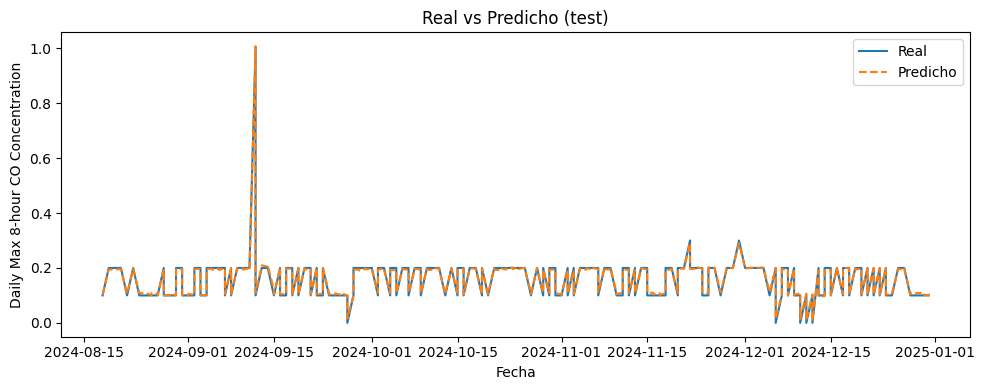

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1) Definir variable objetivo y features
columna_objetivo = 'Daily Max 8-hour CO Concentration'  # misma que en Paso 4

# Todas las columnas excepto la fecha y columnas no numéricas
features = df_model.select_dtypes(include=[np.number]).drop(columns=[columna_objetivo]).columns.tolist()

X = df_model[features]
y = df_model[columna_objetivo]

# 2) Dividir en train y test (80% train, 20% test)
split_idx = int(len(df_model)*0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño test:", X_test.shape)

# 3) Entrenar modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 4) Hacer predicciones
y_pred = model.predict(X_test)

# 5) Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

# 6) Gráfico real vs predicho
plt.figure(figsize=(10,4))
plt.plot(df_model['date'].iloc[split_idx:], y_test.values, label='Real')
plt.plot(df_model['date'].iloc[split_idx:], y_pred, label='Predicho', linestyle='--')
plt.legend()
plt.title("Real vs Predicho (test)")
plt.xlabel("Fecha")
plt.ylabel(columna_objetivo)
plt.tight_layout()
plt.show()


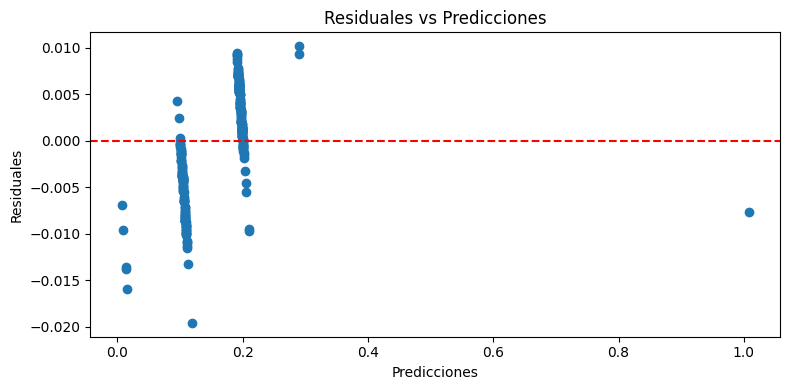

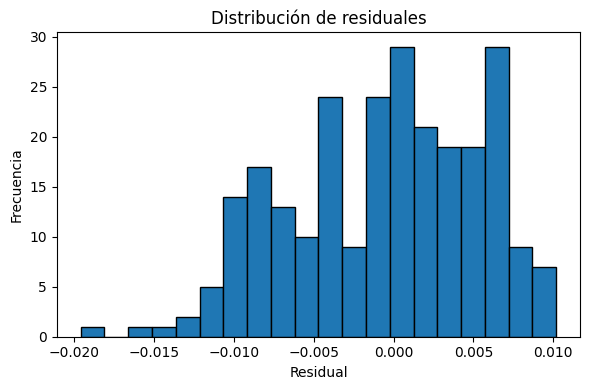

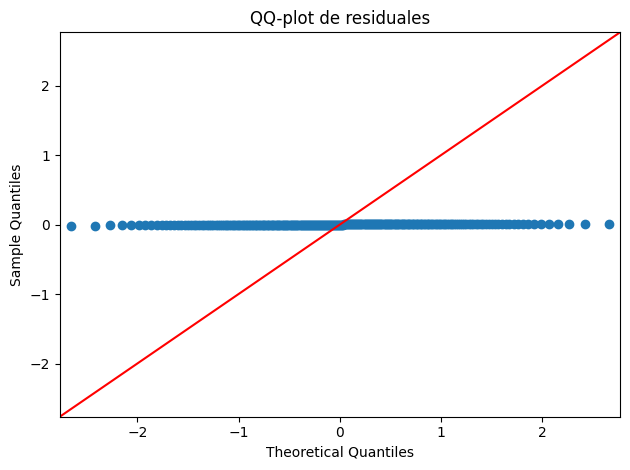

Promedio residuales: -0.0005898453119232814
Desviación estándar residuales: 0.005874210441415784


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Asegúrate de tener y_test y y_pred de la celda anterior
# Calcular residuales
residuals = y_test - y_pred

# 1) Gráfico Residuales vs Predicciones
plt.figure(figsize=(8,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuales")
plt.title("Residuales vs Predicciones")
plt.tight_layout()
plt.show()

# 2) Histograma de residuales
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Distribución de residuales")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 3) QQ-plot para ver normalidad de los residuales
sm.qqplot(residuals, line='45')
plt.title("QQ-plot de residuales")
plt.tight_layout()
plt.show()

# 4) Calcular estadísticos básicos de los residuales
print("Promedio residuales:", np.mean(residuals))
print("Desviación estándar residuales:", np.std(residuals))


In [ ]:
# =========== CREAR DATAFRAME DE FECHAS 2025 Y PREDECIR ==============
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------- Ajusta esto si tu target tiene otro nombre -------------
columna_objetivo = 'Daily Max 8-hour CO Concentration'  # <- cambia si tu columna se llama distinto

# ------------- 1) Mostrar columnas para confirmar nombres -------------
print("Columnas en df (primeras):", list(df.columns)[:20] if 'df' in globals() else "df no existe")
print("Columnas en df_model (primeras):", list(df_model.columns)[:20] if 'df_model' in globals() else "df_model no existe")
print("Target elegido:", columna_objetivo)
if columna_objetivo not in (df.columns.tolist() if 'df' in globals() else []):
    raise ValueError(f"No encuentro la columna objetivo '{columna_objetivo}' en df. Cambia 'columna_objetivo' al nombre correcto.")

# ------------- 2) Crear rango de fechas para 2025 -------------
fechas_2025 = pd.date_range(start='2025-01-01', end='2025-12-31', freq='D')
df_2025 = pd.DataFrame({'date': fechas_2025})

# ------------- 3) Crear mismas features de calendario que usaste -------------
df_2025['year'] = df_2025['date'].dt.year
df_2025['month'] = df_2025['date'].dt.month
df_2025['day'] = df_2025['date'].dt.day
df_2025['weekday'] = df_2025['date'].dt.weekday
df_2025['dayofyear'] = df_2025['date'].dt.dayofyear

# ------------- 4) Asegurar que tenemos una fuente con datos hasta 2024 -------------
# Preferimos df_model (_


Columnas en df (primeras): ['date', 'Source', 'Site ID', 'POC', 'Daily Max 8-hour CO Concentration', 'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count', 'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description', 'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State', 'County FIPS Code', 'County', 'Site Latitude']
Columnas en df_model (primeras): ['date', 'Source', 'Site ID', 'POC', 'Daily Max 8-hour CO Concentration', 'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count', 'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description', 'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State', 'County FIPS Code', 'County', 'Site Latitude']
Target elegido: Daily Max 8-hour CO Concentration


In [ ]:
# Ver las primeras 20 filas
df_2025.head(20)

# o ver cuántas filas tiene
print(df_2025.shape)

# o mostrar todo (si no es muy grande)
df_2025


(365, 6)


,date,year,month,day,weekday,dayofyear
0,2025-01-01,2025,1,1,2,1
1,2025-01-02,2025,1,2,3,2
2,2025-01-03,2025,1,3,4,3
3,2025-01-04,2025,1,4,5,4
4,2025-01-05,2025,1,5,6,5
...,...,...,...,...,...,...
360,2025-12-27,2025,12,27,5,361
361,2025-12-28,2025,12,28,6,362
362,2025-12-29,2025,12,29,0,363
363,2025-12-30,2025,12,30,1,364
